In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("vgsales.csv")

In [4]:
df = df[~df.Year.isnull()] # drop all rows with empty year values

In [5]:
df.Year = df.Year.astype(int)

In [6]:
df.shape

(16327, 11)

In [7]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
# Data found here: https://en.wikipedia.org/wiki/List_of_best-selling_game_consoles
firm_key = {
                'DS'   : ['Nintendo',  'Handheld'],
                'PS2'  : ['Sony',      'Console'],
                'PS3'  : ['Sony',      'Console'],
                'Wii'  : ['Nintendo',  'Console'],
                'X360' : ['Microsoft', 'Console'],
                'PSP'  : ['Sony',      'Handheld'],
                'PS'   : ['Sony',      'Console'],
                'PC'   : ['Microsoft', 'PC'],
                'XB'   : ['Microsoft', 'Console'],
                'GBA'  : ['Nintendo',  'Handheld'],
                'GC'   : ['Nintendo',  'Console'],
                '3DS'  : ['Nintendo',  'Handheld'],
                'PSV'  : ['Sony',      'Handheld'],
                'PS4'  : ['Sony',      'Console'],
                'N64'  : ['Nintendo',  'Console'],
                'SNES' : ['Nintendo',  'Console'],
                'XOne' : ['Microsoft', 'Console'],
                'SAT'  : ['Sega',      'Console'],
                'WiiU' : ['Nintendo',  'Console'],
                '2600' : ['Atari',     'Console'],
                'GB'   : ['Nintendo',  'Handheld'],
                'NES'  : ['Nintendo',  'Console'],
                'DC'   : ['Sega',      'Console'],
                'GEN'  : ['Sega',      'Console'],
                'NG'   : ['Nokia',     'Handheld'],
                'WS'   : ['Bandai',    'Handheld'],
                'SCD'  : ['Sega',      'Console'],
                '3DO'  : ['Panasonic', 'Console'],
                'TG16' : ['NEC',       'Console'],
                'PCFX' : ['NEC',       'Console'],
                'GG'   : ['Sega',      'Handheld']
} 


  

df['Platform_Firm'] = df.Platform.map(lambda x: firm_key[x][0])
df['Platform_Type'] = df.Platform.map(lambda x: firm_key[x][1])

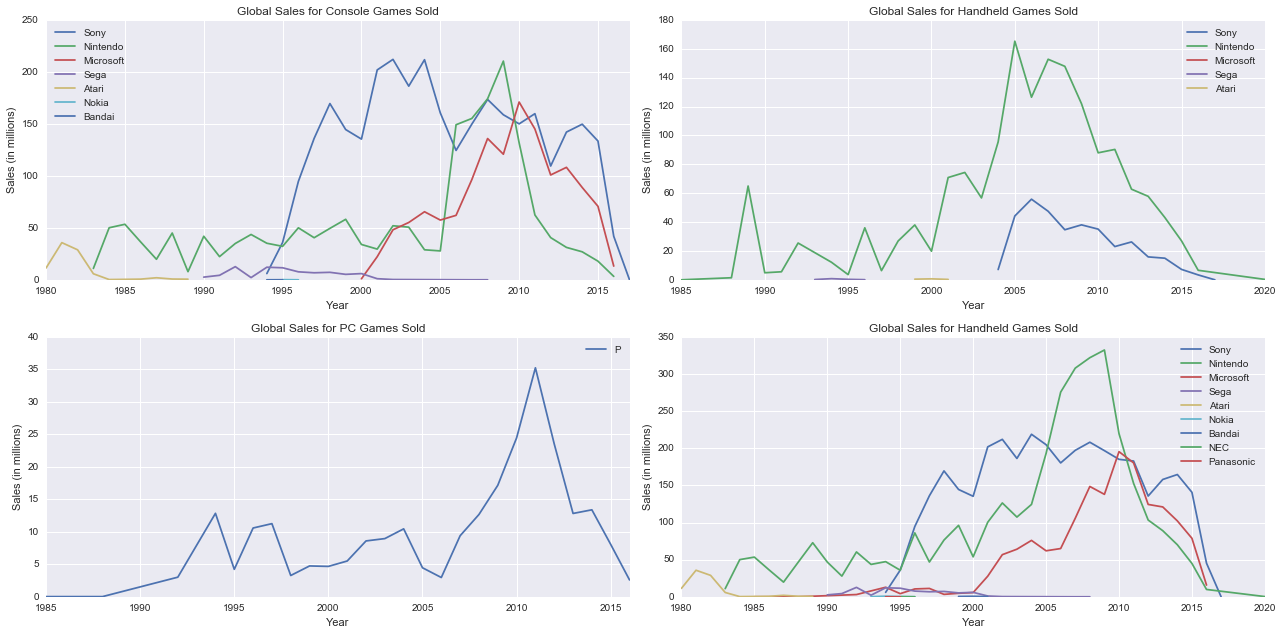

In [9]:
plt.rc('font', size=13)
fig = plt.figure(figsize=(18,9))

platform_firm = list(df.Platform_Firm.value_counts().index) # List of Firms i.e. Sony, Nintendo.

ax1 = plt.subplot2grid((2,2),(0,0))
for firm in platform_firm:
    # Sum up the Global Sales for console made games per Platform Firms
    ax = df[df.Platform_Type == 'Console']
    # Try to plot data for each year per firm. Some Firms like Atari have no sales to plot for certain years.
    try:
        ax[(ax.Platform_Firm == firm)].groupby(['Year'])['Global_Sales'].sum().plot()
        plt.legend(platform_firm, loc='best')
        ax1.set_title("Global Sales for Console Games Sold")
        ax1.set_ylabel("Sales (in millions)")
    except TypeError:
        continue

ax2 = plt.subplot2grid((2,2),(0,1))
for firm in platform_firm:
    # Same as above but for handheld.
    # Should be able to reduce code here by looping through handheld and console.
    ax = df[df.Platform_Type == 'Handheld']
    try:
        ax[(ax.Platform_Firm == firm)].groupby(['Year'])['Global_Sales'].sum().plot()
        plt.legend(platform_firm, loc='best')
        ax2.set_title("Global Sales for Handheld Games Sold")
        ax2.set_ylabel("Sales (in millions)")
    except TypeError:
        continue
        
# Plot PC games seperately
# Could have put PC with Consoles but was interested in being able to compare them.
ax3 = plt.subplot2grid((2,2),(1,0))
df[df.Platform_Type == 'PC'].groupby(['Year'])['Global_Sales'].sum().plot(label='PC')
plt.legend('PC', loc='best')
ax3.set_title("Global Sales for PC Games Sold")
ax3.set_ylabel("Sales (in millions)")

# Comparing all games between firms, regardless of type.
ax4 = plt.subplot2grid((2,2),(1,1))
for firm in platform_firm:
    try:
        df[(df.Platform_Firm == firm)].groupby(['Year'])['Global_Sales'].sum().plot()
        plt.legend(platform_firm, loc='best')
        ax4.set_title("Global Sales for Handheld Games Sold")
        ax4.set_ylabel("Sales (in millions)")
    except TypeError:
        continue
        
plt.tight_layout()

Looks like the gaming market really started to pick up from 1995 and sales have plummeted after 2010. This decrease in game sales seems unlikely as gaming today is bigger than it's ever been. Missing data for later years is more likely here.

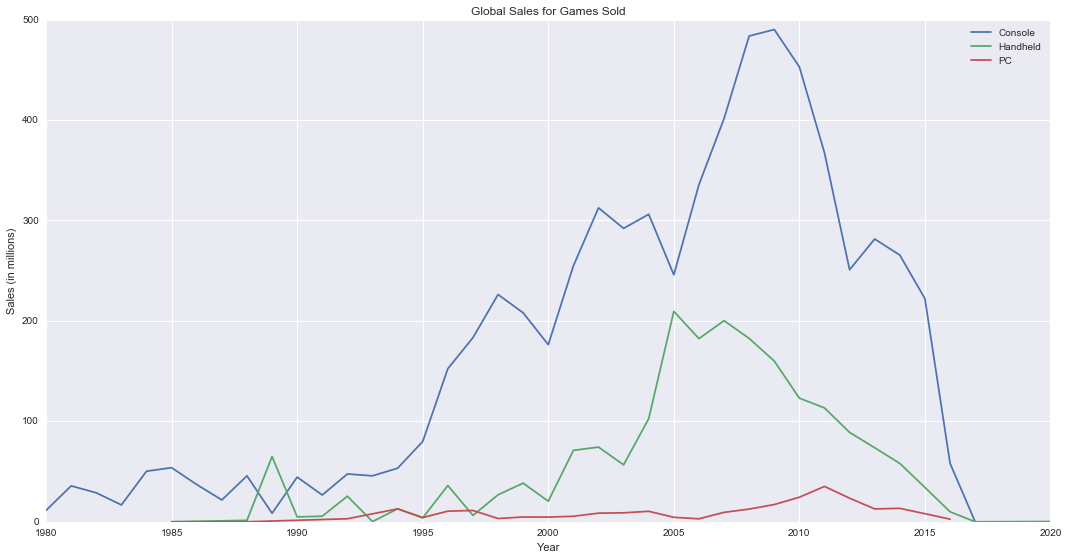

In [10]:
plt.rc('font', size=18)
fig = plt.figure(figsize=(18,9))

df[df.Platform_Type == 'Console'].groupby('Year')['Global_Sales'].sum().plot()
df[df.Platform_Type == 'Handheld'].groupby('Year')['Global_Sales'].sum().plot()
df[df.Platform_Type == 'PC'].groupby('Year')['Global_Sales'].sum().plot()

plt.legend(['Console','Handheld','PC'], loc='best')
plt.title("Global Sales for Games Sold")
plt.ylabel("Sales (in millions)")

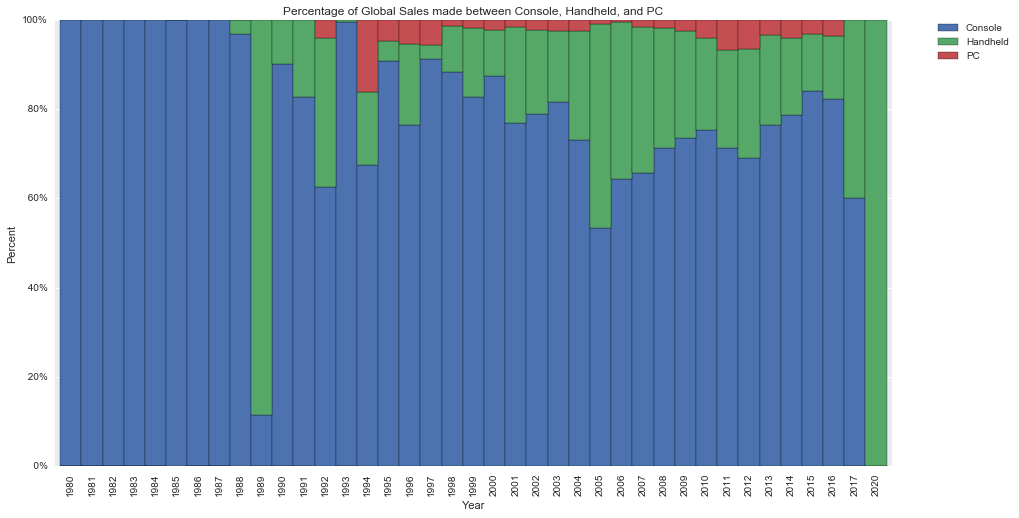

In [11]:
global_sales = df.groupby('Year')['Global_Sales'].sum()

# Create a Series for handheld, console and PC with year and sales as a fraction of total sales for that year.
console_sales_percent = (df[df.Platform_Type == 'Console'].groupby('Year')['Global_Sales'].sum()/global_sales)
handheld_sales_percent = (df[df.Platform_Type == 'Handheld'].groupby('Year')['Global_Sales'].sum()/global_sales)
pc_sales_percent = (df[df.Platform_Type == 'PC'].groupby('Year')['Global_Sales'].sum()/global_sales)

# Create DataFrame with the years as the index and the sales numbers for each platform type as a new column
# This will allow us to use the stacked variable when plotting.
game_type_df = pd.DataFrame({'Console': console_sales_percent.values,
                            'Handheld': handheld_sales_percent.values,
                            'PC': pc_sales_percent.values},
                            index = console_sales_percent.index)

plt.rc('font', size=18)
ax10 = game_type_df.plot(kind='bar', stacked=True, width=1.0, figsize=(15,8))
vals = ax10.get_yticks()
# Change the y values to a percent.
ax10.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
plt.title("Percentage of Global Sales made between Console, Handheld, and PC")
plt.xlabel("Year")
plt.ylabel("Percent")
plt.ylim(0,1)
# Print legend outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Interesting points to take note:
1989 - Nintendo GameBoy was released.
1993 - Doom is released, giving PC their most notable stake in the gaming market for 1994.
2005/6 saw the release of the Xbox360, PS3 and the Wii.

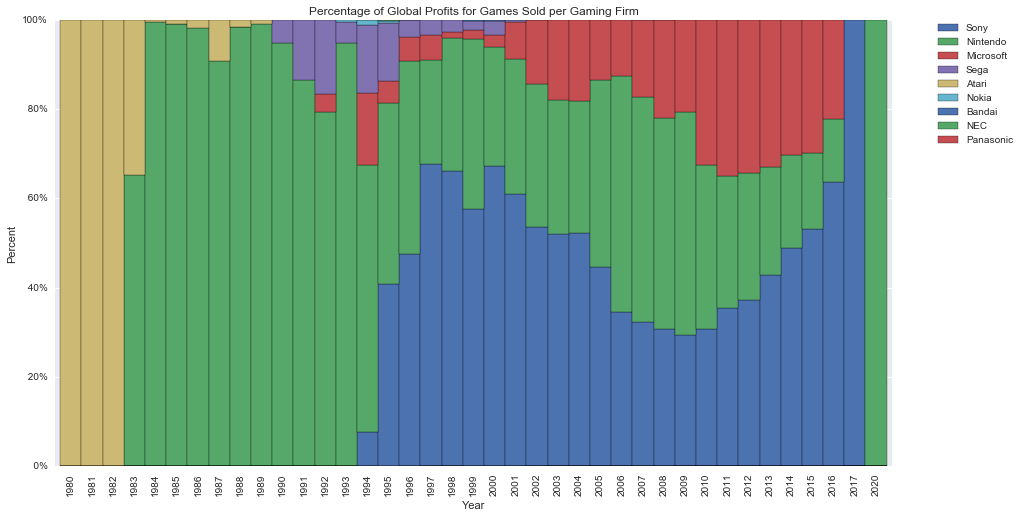

In [12]:
firm_df_key = {}

# Create Dictionary with Firm name as key sales per year in a Series as the value. 
# i.e. {'Atari': Year
#                1980    11.38
#                1981    35.77...
for i in list(df.Platform_Firm.value_counts().index):
    firm_df_key[i] = df[df.Platform_Firm == i].groupby('Year')['Global_Sales'].sum()

# Create empty DataFrame with index as the years.
firm_percent_df = pd.DataFrame(index=df.Year.value_counts().index.sort_values())

# Function takes a firm like Sony, and a Date like 1980
# makes a dictionary(dic) of the Series made in the firm_df_key for that firm.
# If the date is in that Series/dic it returns the sales value, otherwise theres no sales so returns 0.
def getit(date, firm):
    dic = firm_df_key[firm].to_dict() # dic = {1980: 0.25552, 1981: 0.3255} etc.
    if date in dic:
        return dic[date]/(df.groupby('Year')['Global_Sales'].sum().to_dict())[date]
    else:
        return 0

# Creates a new column on the new dataframe for each firm with sales per year as a fraction
for firm in list(df.Platform_Firm.value_counts().index):
    firm_percent_df[firm] = firm_percent_df.index.map(lambda date: getit(date, firm))  #i.e.1980   Nokia

    
plt.rc('font', size=18)
ax11 = firm_percent_df.plot(kind='bar', stacked=True, width=1.0, figsize=(15,8))
yvals = ax11.get_yticks()
ax11.set_yticklabels(['{:3.0f}%'.format(x*100) for x in yvals])
plt.ylim(0,1)
plt.ylabel("Percent")
plt.title("Percentage of Global Profits for Games Sold per Gaming Firm")
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Interesting points. 
Nintendo came and swallowed up Atari's gaming market with the NES in 1983. Dominating the market game sales for a decade until Sony brought out the Playstation in 1994, Sega with the Sega Saturn, and Doom for PC being released.
Microsoft brought out the Xbox in 2001, followed up with the Xbox 360 in 2005 increasing their gaming market substantially over the next few years.
Nintendo released the Game Boy Color in 1998, GB Advance in 2001, the DS in 2004, then the Wii in 2006, gaining back a lot of the market share.
Post 2010 Sony appears to be swallowing up the whole market, however again I believe this to be an issue with missing data in the dataset.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 13 columns):
Rank             16327 non-null int64
Name             16327 non-null object
Platform         16327 non-null object
Year             16327 non-null int32
Genre            16327 non-null object
Publisher        16291 non-null object
NA_Sales         16327 non-null float64
EU_Sales         16327 non-null float64
JP_Sales         16327 non-null float64
Other_Sales      16327 non-null float64
Global_Sales     16327 non-null float64
Platform_Firm    16327 non-null object
Platform_Type    16327 non-null object
dtypes: float64(5), int32(1), int64(1), object(6)
memory usage: 1.7+ MB


In [14]:
console_sales_percent

Year
1980    1.000000
1981    1.000000
1982    1.000000
1983    1.000000
1984    1.000000
1985    0.999073
1986    1.000000
1987    1.000000
1988    0.969081
1989    0.115317
1990    0.900992
1991    0.827180
1992    0.625263
1993    0.995433
1994    0.673866
1995    0.907388
1996    0.765453
1997    0.912280
1998    0.882325
1999    0.827994
2000    0.875074
2001    0.768757
2002    0.790200
2003    0.816431
2004    0.730176
2005    0.534722
2006    0.644327
2007    0.656914
2008    0.712417
2009    0.734422
2010    0.754268
2011    0.711971
2012    0.690378
2013    0.764880
2014    0.787776
2015    0.840115
2016    0.822360
2017    0.600000
2020         NaN
Name: Global_Sales, dtype: float64

In [15]:
firm_df_key

{'Atari': Year
 1980    11.38
 1981    35.77
 1982    28.86
 1983     5.83
 1984     0.27
 1985     0.45
 1986     0.66
 1987     1.98
 1988     0.75
 1989     0.62
 Name: Global_Sales, dtype: float64, 'Bandai': Year
 1999    0.46
 2000    0.68
 2001    0.28
 Name: Global_Sales, dtype: float64, 'Microsoft': Year
 1985      0.03
 1988      0.03
 1992      3.02
 1994     12.85
 1995      4.23
 1996     10.59
 1997     11.26
 1998      3.28
 1999      4.75
 2000      5.67
 2001     27.75
 2002     56.75
 2003     64.12
 2004     75.96
 2005     61.96
 2006     65.00
 2007    105.79
 2008    148.61
 2009    138.01
 2010    195.51
 2011    180.37
 2012    124.41
 2013    121.04
 2014    102.24
 2015     78.78
 2016     15.80
 Name: Global_Sales, dtype: float64, 'NEC': Year
 1995    0.16
 1996    0.03
 Name: Global_Sales, dtype: float64, 'Nintendo': Year
 1983     10.96
 1984     50.09
 1985     53.46
 1986     36.41
 1987     19.76
 1988     46.44
 1989     72.83
 1990     46.79
 1991     2